In [1]:
import pandas as pd
import numpy as np

# import matplotlib as plt 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_df = pd.read_csv("archive/gld_price_data.csv")

In [6]:
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
# no of rows and columns 
gold_df.shape

(2290, 6)

In [9]:
# Getting some basic inforamtion about the data

gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# Count the sum of missing value

gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
# Getting statistical measures of the data
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
# # Correlation between columns in dataset
# 1. Positive Regression
# 2. Negative Regresion

correlation = gold_df.corr()

<AxesSubplot:>

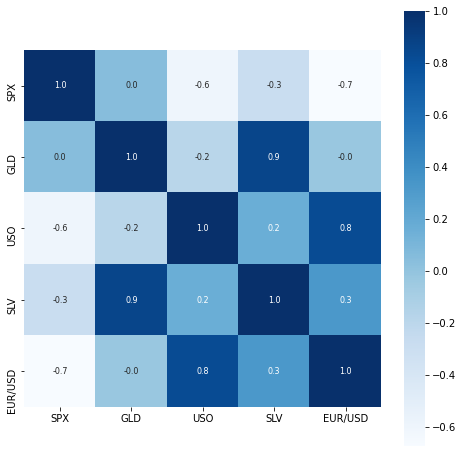

In [18]:
# Custructing heatmap to understand the correlation

plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar = True, square= True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

In [19]:
# Correlation values of GLD

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


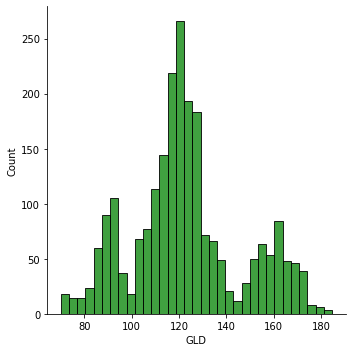

In [20]:
# Check the distribution od gold price

sns.displot(gold_df['GLD'],color='green')

In [22]:
# Splitting the Features and Target

x = gold_df.drop(columns=['GLD','Date'], axis = 1)
y = gold_df['GLD']

In [23]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


Splitting into training and testing data

In [24]:
x_test, x_train, y_test, y_train = train_test_split(x, y, random_state=2 ,test_size=0.2)

print(x_train.shape, x_test.shape)

(458, 4) (1832, 4)


In [25]:
# Model Training

Raddom Forest Regressor

In [26]:
regressor = RandomForestRegressor(n_estimators=100)

In [27]:
# Training the model 

regressor.fit(x_train, y_train)

RandomForestRegressor()

In [28]:
#Model Evaluaion

predicted_y = regressor.predict(x_test)

In [29]:
#Print test data prediction

print(predicted_y)

[108.08039933 114.32770093  91.41459889 ... 134.22139751 160.58340186
 113.53549949]


In [30]:
# Checking the Metrics of model

# R Squared Error

error_score = metrics.r2_score(y_test, predicted_y)

print(f'R2 Squared Error {error_score}')

R2 Squared Error 0.9807869850851706


In [31]:
# Compare the actual values aginst predicted values in a plot

In [32]:
y_test = list(y_test)

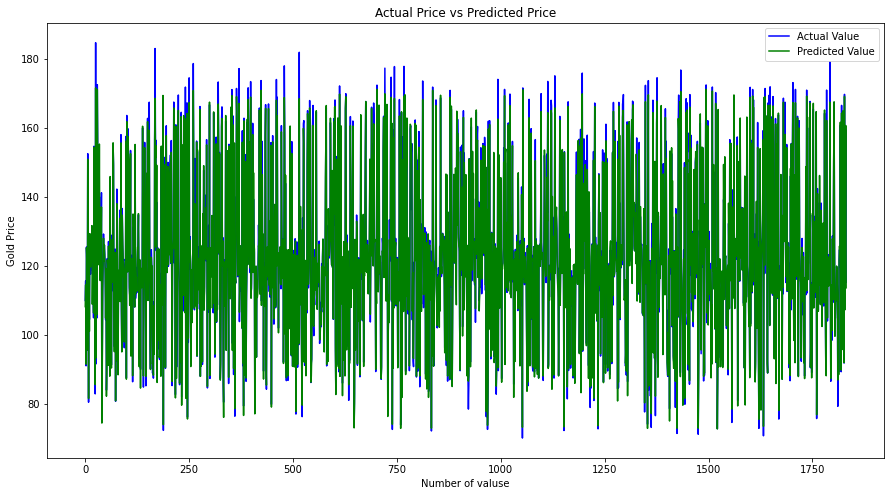

In [40]:
plt.figure(figsize=(15,8))
plt.plot(y_test, color ='blue', label = 'Actual Value')
plt.plot(predicted_y, color='green', label ='Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel('Number of valuse')
plt.ylabel("Gold Price")
plt.legend()
plt.show()